In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

nitrate_data = pd.read_csv('DATA\AG_NO3_fill_cells_remove_NAN.csv', header='infer' ) 
nitrate_data.shape


(30790, 3)

In [2]:
nitrate_data.head()

,Date,NO3N,Student_Flag
0,8/2/2016 12:29,0.071,0.0
1,8/2/2016 12:59,0.030,0.0
2,8/2/2016 13:29,0.030,0.0
3,8/2/2016 13:59,0.030,0.0
4,8/2/2016 14:29,0.030,0.0


In [3]:
nitrate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30790 entries, 0 to 30789
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15808 non-null  object 
 1   NO3N          15808 non-null  float64
 2   Student_Flag  15808 non-null  float64
dtypes: float64(2), object(1)
memory usage: 721.8+ KB


In [4]:
nitrate_data.isnull().any()

Date            True
NO3N            True
Student_Flag    True
dtype: bool

In [5]:
nitrate_data.isnull().sum()

Date            14982
NO3N            14982
Student_Flag    14982
dtype: int64

In [6]:
nitrate_data = nitrate_data[pd.notnull(nitrate_data['Date'])]
nitrate_data.isnull().sum()

Date            0
NO3N            0
Student_Flag    0
dtype: int64

In [7]:
#nitrate_data = nitrate_data[:20]
anamoly_event_count = len(nitrate_data[nitrate_data['Student_Flag']==1.0])
print('anamoly_event_count:',anamoly_event_count)
normal_event_count = len(nitrate_data[nitrate_data['Student_Flag']==0.0])
print('normal_event_count:',normal_event_count)
#print('Our Data:',nitrate_data)
window = 6
percentile_var = 95
N = len(nitrate_data)
print('Data Length:',N)
window_start_index = 0
correct_anamoly_count = 0
correct_normal_count = 0

while window_start_index <= N - window:
    #print("window_start_index : ",window_start_index)
    if window_start_index == 0:
        working_data = nitrate_data[window_start_index:window_start_index+window]
        #print("Iteration : ",window_start_index)
        percentile = np.percentile(working_data.NO3N, percentile_var)
        #print('Percentile:',percentile)
        np_arr = np.array(working_data)
        for i in np_arr:
            #this block is for anamoly record
            if i[1] > percentile:
                #print('outlier record:',i)
                #correct
                if i[2] == 1:
                    correct_anamoly_count += 1
                    #print('correct')
            # this block is for normal event
            else:
                #print('normal record:',i)
                if i[2] == 0:
                    correct_normal_count +=1
    else:
        working_data = nitrate_data[window_start_index:window_start_index+window]
        #print("Iteration : ",window_start_index)
        percentile = np.percentile(working_data.NO3N, percentile_var)
        #print('Percentile:',percentile)
        np_arr = np.array(working_data)
        new_added_record = np_arr[window-1]
        #this block is for anamoly record
        if new_added_record[1] > percentile:
            #print('outlier record:',new_added_record)
            #correct
            if new_added_record[2] == 1:
                correct_anamoly_count += 1
                #print('correct')
        # this block is for normal event
        else:
            #print('normal record:',new_added_record)
            if new_added_record[2] == 0:
                correct_normal_count +=1
    window_start_index += 1

print('anamoly record :',correct_anamoly_count)
print('normal record :',correct_normal_count)

print('anamoly record detection accuracy:',correct_anamoly_count/anamoly_event_count)
print('normal record detection accuracy:',correct_normal_count/normal_event_count)


anamoly_event_count: 77
normal_event_count: 15731
Data Length: 15808
anamoly record : 58
normal record : 13178
anamoly record detection accuracy: 0.7532467532467533
normal record detection accuracy: 0.8377089822643189


Text(0, 0.5, 'Nitrate Value')

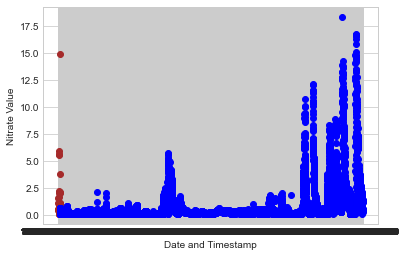

In [10]:
anamoly = nitrate_data[nitrate_data['Student_Flag']==1.0]
normal = nitrate_data[nitrate_data['Student_Flag']==0.0]
x1 = anamoly.Date
y1 = anamoly.NO3N
x2 = normal.Date
y2 = normal.NO3N
plt.scatter(x1, y1, marker='o',color='brown')
plt.scatter(x2, y2, marker='o',color='blue')
plt.xlabel('Date and Timestamp')
plt.ylabel('Nitrate Value')